In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

zstar coordinates
convergence

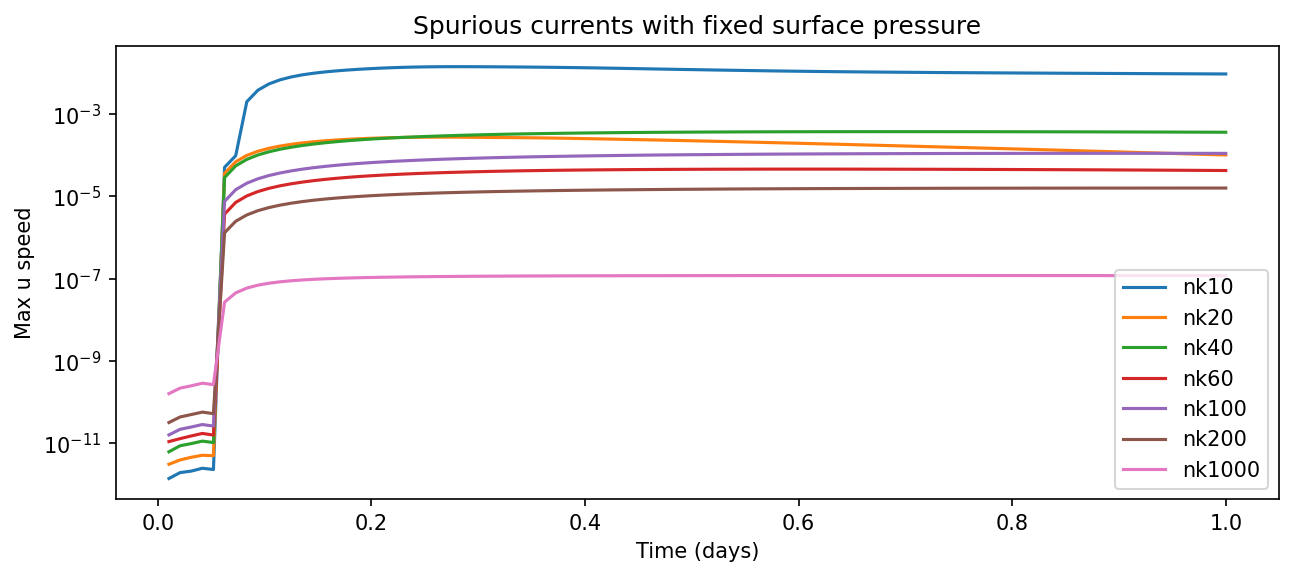

In [5]:
fig,axes = plt.subplots(figsize = (10,4),dpi = 150)
for i in np.arange(7):
    nk = [10,20,40,60,100,200,1000][i]
    prog = xr.open_dataset('5pt-z/prog-nk'+str(nk)+'.nc')

    plt.plot((np.arange(len(prog.Time.values))*900+900)/(3600*24),
             np.abs(prog.u.isel(yh = 0)).max(['xq','zl']).values, label = 'nk'+str(nk))
plt.ylabel('Max u speed')
plt.xlabel('Time (days)')
plt.legend()
plt.yscale('log')
plt.title('Spurious currents with fixed surface pressure')
plt.show()


# make ice shelf for different x sizes


In [2]:
toposeamount = xr.open_dataset('ocean_geometry.nc')
seamountice = toposeamount.D
seamountice = 4000-seamountice
seamounticeds = xr.merge([(seamountice)*1035/900, toposeamount.Ah])
seamounticeds.to_netcdf('INPUT/fatseamountice-ni80.nc')


In [3]:
toposeamount.close()

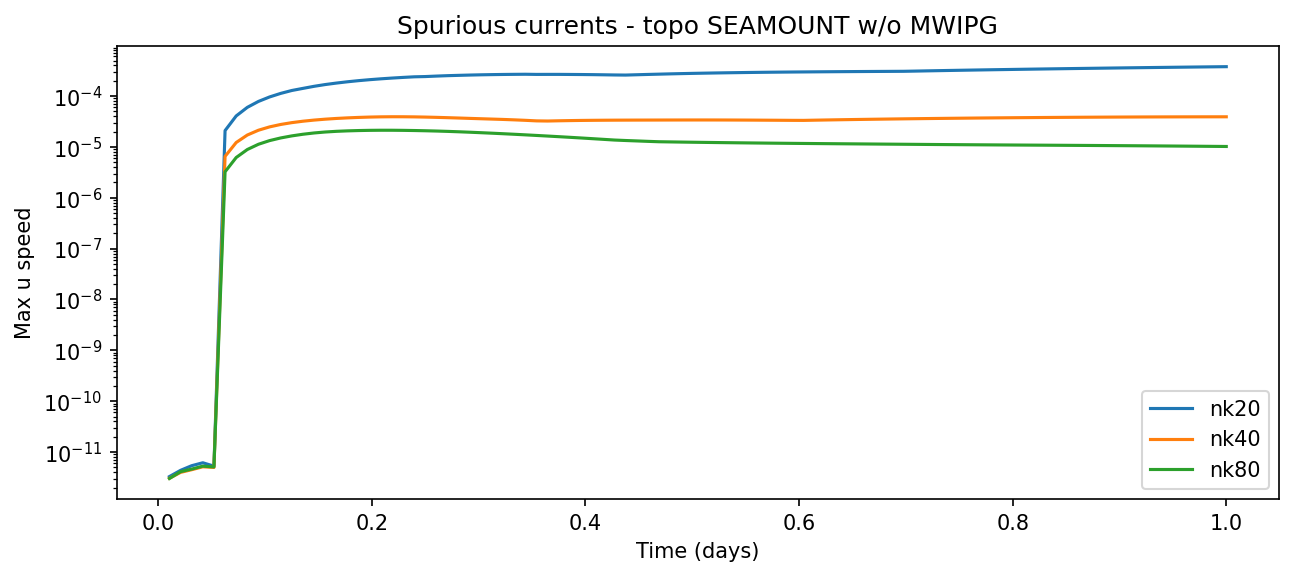

In [8]:
fig,axes = plt.subplots(figsize = (10,4),dpi = 150)
for i in np.arange(3):
    nk = [20,40,80][i]
    prog = xr.open_dataset('5pt-x-sm/prog-ni'+str(nk)+'.nc')

    plt.plot((np.arange(len(prog.Time.values))*900+900)/(3600*24),
             np.abs(prog.u.isel(yh = 0)).max(['xq','zl']).values, label = 'nk'+str(nk))
plt.ylabel('Max u speed')
plt.xlabel('Time (days)')
plt.legend()
plt.yscale('log')
plt.title('Spurious currents - topo SEAMOUNT w/o MWIPG')
plt.show()


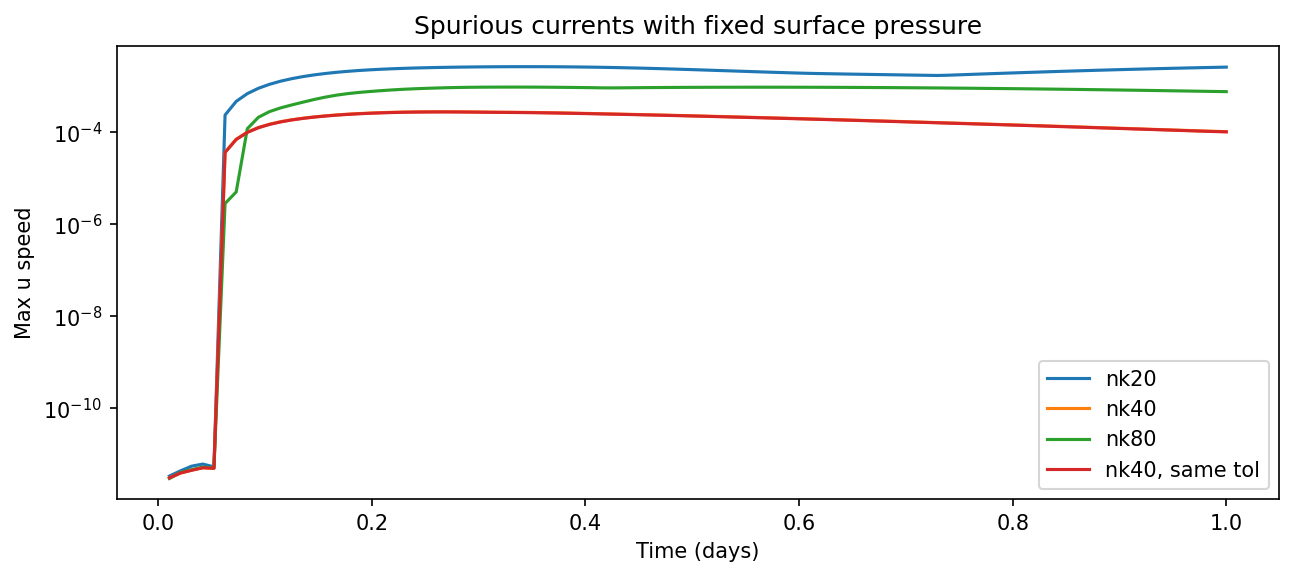

In [10]:
fig,axes = plt.subplots(figsize = (10,4),dpi = 150)
for i in np.arange(3):
    nk = [20,40,80][i]
    prog = xr.open_dataset('5pt-x/prog-ni'+str(nk)+'.nc')

    plt.plot((np.arange(len(prog.Time.values))*900+900)/(3600*24),
             np.abs(prog.u.isel(yh = 0)).max(['xq','zl']).values, label = 'nk'+str(nk))
prog = xr.open_dataset('5pt-x/prog-ni40-tol1e-13.nc')

plt.plot((np.arange(len(prog.Time.values))*900+900)/(3600*24),
         np.abs(prog.u.isel(yh = 0)).max(['xq','zl']).values, label = 'nk40, same tol')

plt.ylabel('Max u speed')
plt.xlabel('Time (days)')
plt.legend()
plt.yscale('log')
plt.title('Spurious currents with fixed surface pressure')
plt.show()


(needed to change tolerance to 1e-13 for NK80 and NK20 instead of 1e-14 so maybe that's why order is different??)